<a href="https://colab.research.google.com/github/ajaykittu/ajay/blob/main/DATA_PREPROCESSING_IN_HOTEL_BOOKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import statsmodels.formula.api as smf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.xlsx to hotel_bookings (1).xlsx


In [ ]:
import io
df=pd.read_excel(io.BytesIO(uploaded['hotel_bookings.xlsx']))
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0.0,23.0,2017.0,August,35.0,30.0,2.0,5.0,2.0,...,No Deposit,394.0,NaN,0.0,Transient,96.14,0.0,0.0,Check-Out,2017-09-06
119386,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2.0,5.0,3.0,...,No Deposit,9.0,NaN,0.0,Transient,225.43,0.0,2.0,Check-Out,2017-09-07
119387,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,No Deposit,9.0,NaN,0.0,Transient,157.71,0.0,4.0,Check-Out,2017-09-07
119388,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,No Deposit,89.0,NaN,0.0,Transient,104.40,0.0,0.0,Check-Out,2017-09-07


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  float64       
 2   lead_time                       119390 non-null  float64       
 3   arrival_date_year               119390 non-null  float64       
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  float64       
 6   arrival_date_day_of_month       119390 non-null  float64       
 7   stays_in_weekend_nights         119390 non-null  float64       
 8   stays_in_week_nights            119390 non-null  float64       
 9   adults                          119390 non-null  float64       
 10  children                        119386 non-null  float64

In [ ]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df['adults'].value_counts()
df['adr'].value_counts()

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: adr, Length: 8879, dtype: int64

In [ ]:
adr=df['adr']>0
df=df[adr]
df.shape

(117430, 32)

In [ ]:
df=df[df['adults']+df['children']+df['babies']>0]
df.shape

(117395, 32)

In [ ]:
df.fillna({'country':'unknown','agent':0,'company':0},inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
df['hotel'].value_counts()

City Hotel      78088
Resort Hotel    39307
Name: hotel, dtype: int64

In [ ]:
print(df['country'].value_counts())
print(df['agent'].value_counts())
print(df['company'].value_counts())

PRT    47023
GBR    12052
FRA    10359
ESP     8488
DEU     7246
       ...  
DJI        1
HND        1
BWA        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64
9.0      31844
0.0      15385
240.0    13788
1.0       7078
14.0      3617
         ...  
285.0        1
289.0        1
93.0         1
265.0        1
59.0         1
Name: agent, Length: 333, dtype: int64
0.0      111018
40.0        918
223.0       771
67.0        267
153.0       208
          ...  
100.0         1
96.0          1
76.0          1
302.0         1
104.0         1
Name: company, Length: 344, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


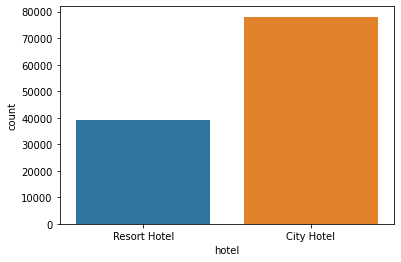

In [ ]:
sns.countplot(df['hotel'])

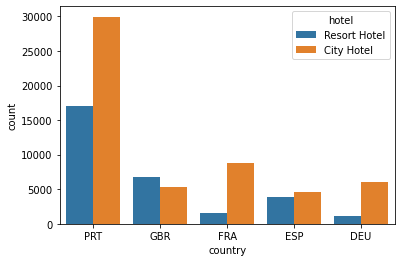

In [ ]:
sns.countplot(x='country',hue='hotel',data=df,order=df.country.value_counts().iloc[:5].index)

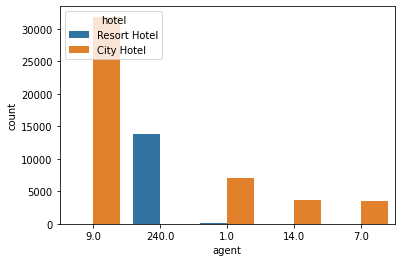

In [ ]:
df_agent=df[df['agent']>0]
sns.countplot(x='agent',hue='hotel',data=df_agent,order=df_agent.agent.value_counts().iloc[:5].index)

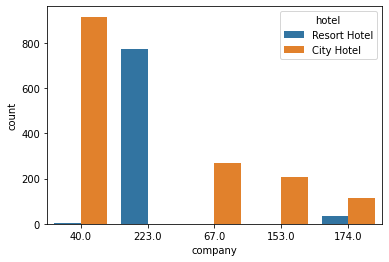

In [ ]:
df_company=df[df['company']>0]
sns.countplot(x='company',hue='hotel',data=df_company,order=df_company.company.value_counts().iloc[:5].index)

In [ ]:
df["is_canceled"].value_counts(normalize=True)

0.0    0.625137
1.0    0.374863
Name: is_canceled, dtype: float64

37%cancelled their Reservation

In [ ]:
df['children'].fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


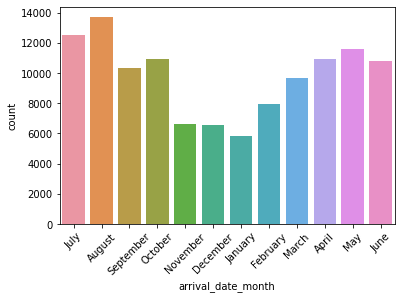

In [ ]:
sns.countplot(df['arrival_date_month'])
plt.xticks(rotation=45)
plt.show()

bussiness is lowest from november to February and booming in July and August

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


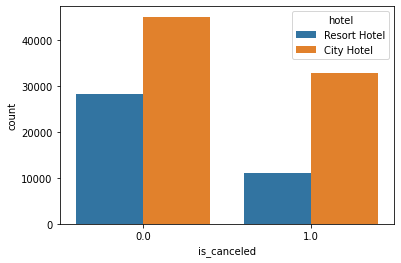

In [ ]:
sns.countplot(df['is_canceled'],hue=df['hotel'])
plt.show()

In [ ]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.290567,0.014210,0.009577,-0.006262,-0.006823,0.018954,0.056245,0.004388,-0.032479,-0.074540,0.110675,-0.054841,-0.144580,-0.048267,-0.083479,0.054110,0.030454,-0.197509,-0.237367
lead_time,0.290567,1.000000,0.038490,0.129354,0.001940,0.079453,0.160576,0.122833,-0.038685,-0.020305,-0.111017,0.087466,-0.069504,0.001705,-0.017482,-0.084582,0.169538,-0.087111,-0.117616,-0.095117
arrival_date_year,0.014210,0.038490,1.000000,-0.539165,-0.000080,0.018872,0.028741,0.042874,0.054648,-0.012417,0.011041,-0.122237,0.028883,0.032053,0.056398,0.033857,-0.056950,0.195542,-0.016074,0.108119
arrival_date_week_number,0.009577,0.129354,-0.539165,1.000000,0.067312,0.019727,0.017255,0.028153,0.005693,0.009578,-0.032532,0.036168,-0.020665,0.007244,-0.018531,-0.032949,0.022324,0.083816,0.003534,0.027342
arrival_date_day_of_month,-0.006262,0.001940,-0.000080,0.067312,1.000000,-0.016644,-0.029346,0.002201,0.014277,-0.000290,-0.004102,-0.026848,0.001594,0.011237,-0.000804,0.003667,0.021712,0.030479,0.008505,0.003451
stays_in_weekend_nights,-0.006823,0.079453,0.018872,0.019727,-0.016644,1.000000,0.488350,0.105804,0.046184,0.020012,-0.074358,-0.012424,-0.038654,0.045081,0.162681,-0.080737,-0.055852,0.033691,-0.019289,0.075572
stays_in_week_nights,0.018954,0.160576,0.028741,0.017255,-0.029346,0.488350,1.000000,0.107855,0.044405,0.021618,-0.079863,-0.013973,-0.045797,0.074131,0.198298,-0.043572,-0.003912,0.046203,-0.025572,0.071057
adults,0.056245,0.122833,0.042874,0.028153,0.002201,0.105804,0.107855,1.000000,0.035004,0.021008,-0.166356,-0.006818,-0.126300,-0.046308,0.027772,-0.196523,-0.008928,0.270726,0.018032,0.152114
children,0.004388,-0.038685,0.054648,0.005693,0.014277,0.046184,0.044405,0.035004,1.000000,0.022894,-0.031196,-0.024611,-0.020399,0.052284,0.050250,-0.042769,-0.033466,0.335060,0.056364,0.082048
babies,-0.032479,-0.020305,-0.012417,0.009578,-0.000290,0.020012,0.021618,0.021008,0.022894,1.000000,-0.009451,-0.007472,-0.006652,0.088294,0.031518,-0.009228,-0.010570,0.032287,0.036817,0.096930


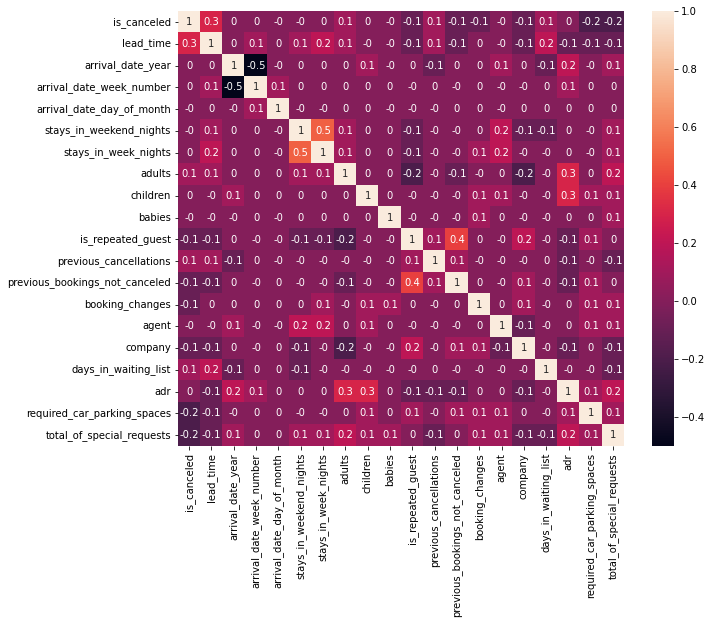

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(1),annot=True)
plt.show()

no strong correlation between numeric features

In [ ]:
df['arrival_date_year'].value_counts()

2016.0    55769
2017.0    40221
2015.0    21405
Name: arrival_date_year, dtype: int64

In [ ]:
df_egypt=df[df['country']=='EGY']
df_egypt.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
27432,Resort Hotel,0.0,1.0,2016.0,August,35.0,27.0,1.0,1.0,2.0,...,No Deposit,306.0,0.0,0.0,Transient,122.89,0.0,0.0,Check-Out,2016-08-29
45754,City Hotel,0.0,98.0,2015.0,November,48.0,23.0,1.0,2.0,1.0,...,No Deposit,37.0,0.0,0.0,Transient-Party,70.00,0.0,0.0,Check-Out,2015-11-26
45762,City Hotel,0.0,98.0,2015.0,November,48.0,23.0,1.0,2.0,1.0,...,No Deposit,37.0,0.0,0.0,Transient-Party,70.00,0.0,0.0,Check-Out,2015-11-26
46225,City Hotel,0.0,0.0,2015.0,December,52.0,26.0,2.0,2.0,2.0,...,No Deposit,9.0,0.0,0.0,Transient,90.00,0.0,1.0,Check-Out,2015-12-30
46718,City Hotel,0.0,149.0,2016.0,January,4.0,17.0,2.0,2.0,1.0,...,No Deposit,19.0,0.0,63.0,Transient-Party,71.00,0.0,0.0,Check-Out,2016-01-21
46719,City Hotel,0.0,149.0,2016.0,January,4.0,17.0,2.0,3.0,1.0,...,No Deposit,19.0,0.0,63.0,Transient-Party,71.00,0.0,0.0,Check-Out,2016-01-22
56292,City Hotel,1.0,54.0,2016.0,September,36.0,2.0,2.0,3.0,3.0,...,No Deposit,9.0,0.0,0.0,Transient,139.86,0.0,0.0,Canceled,2016-07-17
57043,City Hotel,1.0,22.0,2016.0,September,38.0,17.0,0.0,1.0,1.0,...,No Deposit,9.0,0.0,0.0,Transient,284.10,0.0,0.0,Canceled,2016-08-26
57556,City Hotel,1.0,44.0,2016.0,September,40.0,27.0,0.0,2.0,2.0,...,No Deposit,9.0,0.0,0.0,Transient,149.40,0.0,1.0,Canceled,2016-09-26
60150,City Hotel,1.0,25.0,2016.0,November,46.0,6.0,2.0,4.0,2.0,...,No Deposit,9.0,0.0,0.0,Transient,168.38,0.0,1.0,Canceled,2016-10-31


In [ ]:
df_ch=df[df['hotel']=='City Hotel']
df_rh=df[df['hotel']=='Resort Hotel']

In [ ]:
print(df_ch['adr'].mean())
print(df_rh['adr'].mean())

106.95408475053786
96.77138270537054


In [ ]:
df['deposit_type'].value_counts()

No Deposit    102646
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

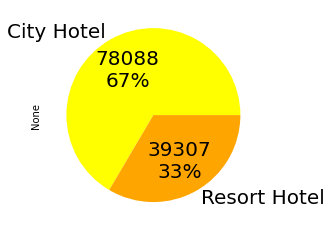

In [ ]:
def label_function(val):
     return f'{val/100*len(df):.0f}\n{val:.0f}%'
df.groupby('hotel').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':20},colors=['yellow','orange'])

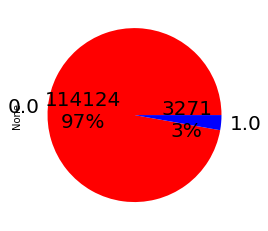

In [ ]:
df.groupby('is_repeated_guest').size().plot(kind='pie',autopct=label_function,textprops={'fontsize':20},colors=['red','blue'])

In [ ]:
smf.ols('adr ~ adults + stays_in_weekend_nights +market_segment +required_car_parking_spaces',data=df).fit().params

Intercept                          81.128765
market_segment[T.Complementary]   -82.486621
market_segment[T.Corporate]       -37.699007
market_segment[T.Direct]           -3.963832
market_segment[T.Groups]          -39.395764
market_segment[T.Offline TA/TO]   -31.623905
market_segment[T.Online TA]        -5.368789
adults                             21.576398
stays_in_weekend_nights            -0.306084
required_car_parking_spaces         3.888992
dtype: float64